In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\df_small_updated_pet_status.pkl")

In [3]:
path = r"C:\Users\Windows\Instacart Basket Analysis"

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group,pet_status
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes,Not a Pet Owner
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,8/1/2019,1,married,49620,Midwest,Senior,low income,meat seafood,Yes,Not a Pet Owner
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,8/1/2019,1,married,49620,Midwest,Senior,low income,meat seafood,Yes,Not a Pet Owner
6,4913,Table Water Crackers,19,19,4.4,894221,138,23,5,13,...,8/1/2019,1,married,49620,Midwest,Senior,low income,snacks,Yes,Not a Pet Owner
10,7987,Hazelnut Spread with Cocoa,13,13,12.8,1592314,138,5,0,9,...,8/1/2019,1,married,49620,Midwest,Senior,low income,pantry,Yes,Not a Pet Owner


## Top Selling Products Overall

In [5]:
total_sales_by_product = df.groupby('product_name')['prices'].sum().sort_values(ascending=False)

C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\1876969125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_sales_by_product = df.groupby('product_name')['prices'].sum().sort_values(ascending=False)


In [6]:
total_sales_by_product.head(10)

product_name
2 % Reduced Fat  Milk               19199808.0
Lowfat 2% Milkfat Cottage Cheese    17492600.0
Banana                               1631139.9
Bag of Organic Bananas               1105190.0
Large Lemon                           587790.0
Limes                                 582649.2
Organic Baby Spinach                  555632.0
Organic Strawberries                  548945.4
Organic Whole Milk                    500544.0
Cucumber Kirby                        356452.8
Name: prices, dtype: float64

In [7]:
a = pd.DataFrame(total_sales_by_product.head(10))

In [8]:
a

,prices
product_name,
2 % Reduced Fat Milk,19199808.0
Lowfat 2% Milkfat Cottage Cheese,17492600.0
Banana,1631139.9
Bag of Organic Bananas,1105190.0
Large Lemon,587790.0
Limes,582649.2
Organic Baby Spinach,555632.0
Organic Strawberries,548945.4
Organic Whole Milk,500544.0


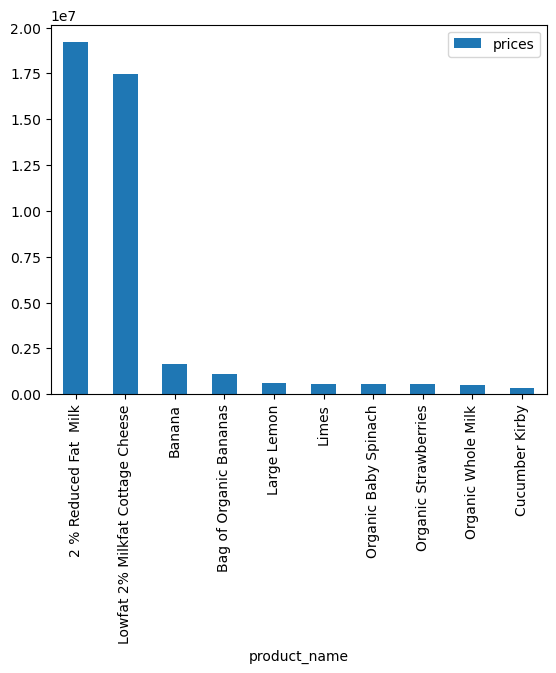

In [9]:
top_selling_products = a.plot.bar()

In [10]:
top_selling_products

<Axes: xlabel='product_name'>

In [11]:
top_selling_products.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_selling_products.png'))

### Top 10 Most Popular Food Items Overall

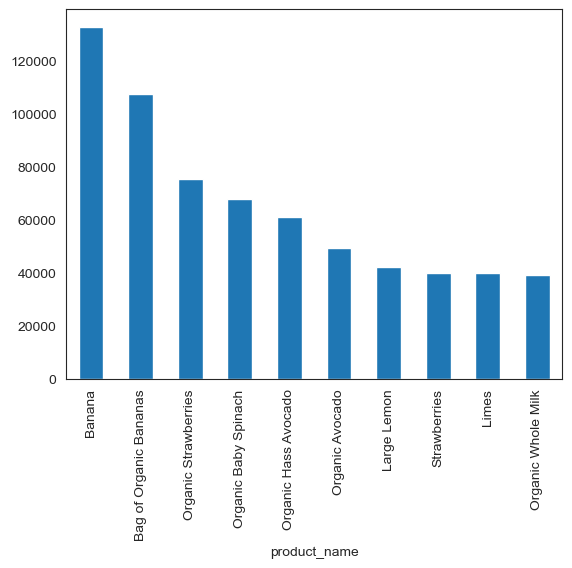

In [55]:
df_most_pop_food = df['product_name'].value_counts().head(10)
most_pop_food= df_most_pop_food.plot.bar()
most_pop_food.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','most_pop_food.png'))

##  Product Analysis of Customer Segments 

### Top Products for high and middle income groups

In [12]:
# What are the top selling products in dairy eggs and produce for these two income groups?
top_products_mid_high_income = df[(df['department'].isin(['dairy eggs', 'produce'])) & (df['income_group'].isin(['high income', 'middle income']))]

In [13]:
top_products_mid_high_income.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group,pet_status
399,4724,Broccoli Florettes,4,4,7.8,3305552,777,2,1,7,...,1/4/2019,2,married,57797,West,Adult,middle income,produce,Yes,Not a Pet Owner
402,4724,Broccoli Florettes,4,4,7.8,2785250,777,8,2,16,...,1/4/2019,2,married,57797,West,Adult,middle income,produce,Yes,Not a Pet Owner
403,4724,Broccoli Florettes,4,4,7.8,677426,777,9,4,10,...,1/4/2019,2,married,57797,West,Adult,middle income,produce,Yes,Not a Pet Owner
405,4724,Broccoli Florettes,4,4,7.8,1701441,777,16,1,7,...,1/4/2019,2,married,57797,West,Adult,middle income,produce,Yes,Not a Pet Owner
406,4724,Broccoli Florettes,4,4,7.8,3379288,777,20,6,8,...,1/4/2019,2,married,57797,West,Adult,middle income,produce,Yes,Not a Pet Owner


In [14]:
b = top_products_mid_high_income['product_name'].value_counts().head(10)

In [15]:
b

product_name
Banana                    122442
Bag of Organic Bananas     95491
Organic Strawberries       68395
Organic Baby Spinach       62012
Organic Hass Avocado       54980
Organic Avocado            45766
Large Lemon                39717
Limes                      37682
Organic Whole Milk         37106
Organic Raspberries        34998
Name: count, dtype: int64

In [16]:
b = pd.DataFrame(b)

In [17]:
b

,count
product_name,
Banana,122442
Bag of Organic Bananas,95491
Organic Strawberries,68395
Organic Baby Spinach,62012
Organic Hass Avocado,54980
Organic Avocado,45766
Large Lemon,39717
Limes,37682
Organic Whole Milk,37106


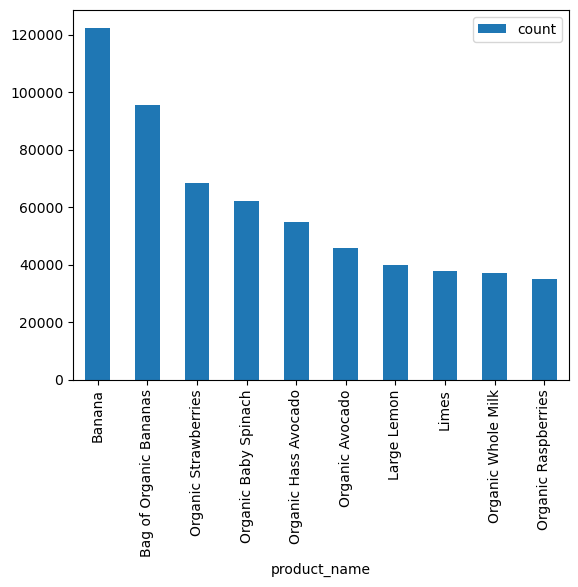

In [18]:
top_products_mid_high_income = b.plot.bar()

In [19]:
top_products_mid_high_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_products_mid_high_income.png'))

### Top products for Married Customers 

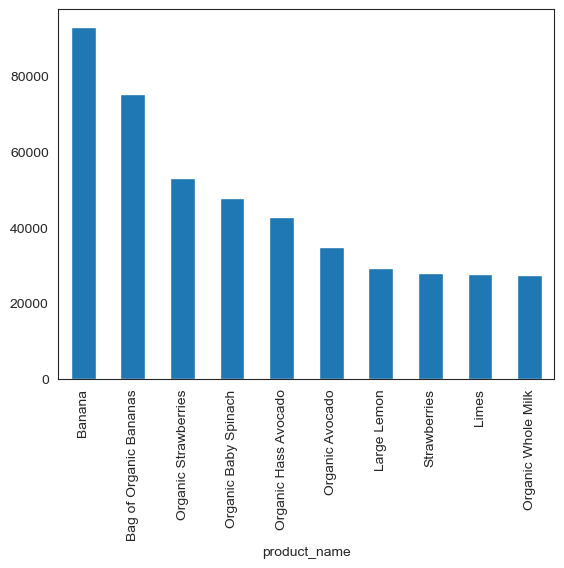

In [49]:
df_married = df[(df['fam_status'] == 'married') & (df['department'].isin(['produce', 'dairy eggs']))]
df_married_top_10 = df_married['product_name'].value_counts().head(10)
top_10_married = df_married_top_10.plot.bar()
top_10_married.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_married.png'))

In [50]:
df_married_top_10

product_name
Banana                    93000
Bag of Organic Bananas    75267
Organic Strawberries      52910
Organic Baby Spinach      47657
Organic Hass Avocado      42614
Organic Avocado           34714
Large Lemon               29342
Strawberries              27970
Limes                     27730
Organic Whole Milk        27501
Name: count, dtype: int64

###  Top products for Singles in the Midwest

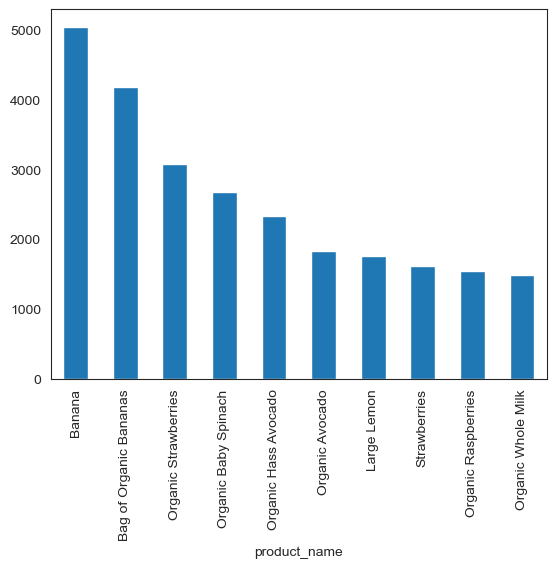

In [56]:
single_midwest = df[(df['fam_status'] == 'single') & (df['Region'] == 'Midwest')]
single_midwest_top_10 = single_midwest['product_name'].value_counts().head(10)
single_midwest_top_10_plot = single_midwest_top_10.plot.bar()
single_midwest_top_10_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','single_midwest_top_10.png'))

### Top 10 products for Northeast - Divorced/Widowed

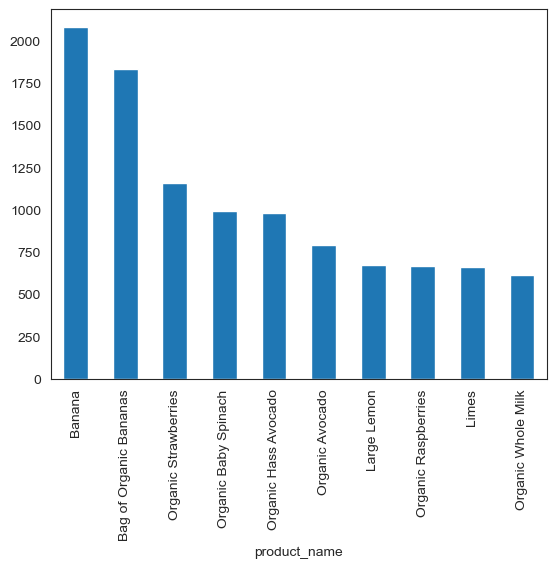

In [58]:
dw_northeast = df[(df['fam_status'] == 'divorced/widowed') & (df['Region'] == 'Northeast')]
dw_northeast_top_10 = dw_northeast['product_name'].value_counts().head(10)
dw_northeast_top_10_plot = dw_northeast_top_10.plot.bar()
dw_northeast_top_10_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','dw_northeast_top_10.png'))

fam_status
married                             6354577
single                              1487858
divorced/widowed                     773786
living with parents and siblings     433857
Name: count, dtype: int64

### Top departments and products for Young Adults in Midwest

In [20]:
# subsetting for young adults in Midwest
df_ya_midwest= df[(df['age_group'] == 'Young Adult')&(df['Region'] == 'Midwest')]

In [21]:
df_ya_midwest

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group,pet_status
8025,1,Chocolate Sandwich Cookies,19,19,5.8,1173455,15182,16,4,15,...,6/7/2018,3,living with parents and siblings,42406,Midwest,Young Adult,low income,snacks,Yes,Not a Pet Owner
8026,1,Chocolate Sandwich Cookies,19,19,5.8,2402639,15182,18,2,0,...,6/7/2018,3,living with parents and siblings,42406,Midwest,Young Adult,low income,snacks,Yes,Not a Pet Owner
8032,1,Chocolate Sandwich Cookies,19,19,5.8,2932279,15182,31,6,22,...,6/7/2018,3,living with parents and siblings,42406,Midwest,Young Adult,low income,snacks,Yes,Not a Pet Owner
8035,1,Chocolate Sandwich Cookies,19,19,5.8,1358938,15182,37,0,14,...,6/7/2018,3,living with parents and siblings,42406,Midwest,Young Adult,low income,snacks,Yes,Not a Pet Owner
8042,1,Chocolate Sandwich Cookies,19,19,5.8,2377402,15182,56,4,12,...,6/7/2018,3,living with parents and siblings,42406,Midwest,Young Adult,low income,snacks,Yes,Not a Pet Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32403472,39877,Organic Granny Smith Apple,4,4,1.3,443868,195723,7,6,9,...,9/10/2017,0,single,34230,Midwest,Young Adult,low income,produce,No,Not a Pet Owner
32403856,38573,Large Trash Bags 30 Gallon,17,17,11.0,2250166,33545,1,5,11,...,8/7/2019,0,single,62563,Midwest,Young Adult,middle income,household,No,Not a Pet Owner
32403858,38573,Large Trash Bags 30 Gallon,17,17,11.0,294550,33545,3,0,15,...,8/7/2019,0,single,62563,Midwest,Young Adult,middle income,household,No,Not a Pet Owner
32403859,38573,Large Trash Bags 30 Gallon,17,17,11.0,2030373,33545,4,3,10,...,8/7/2019,0,single,62563,Midwest,Young Adult,middle income,household,No,Not a Pet Owner


C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\220484756.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ya_midwest_dept = sns.countplot(data=df_ya_midwest, x='department', palette = 'Dark2')
C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\220484756.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ya_midwest_dept.set_xticklabels(ya_midwest_dept.get_xticklabels(), rotation=45, horizontalalignment='right')


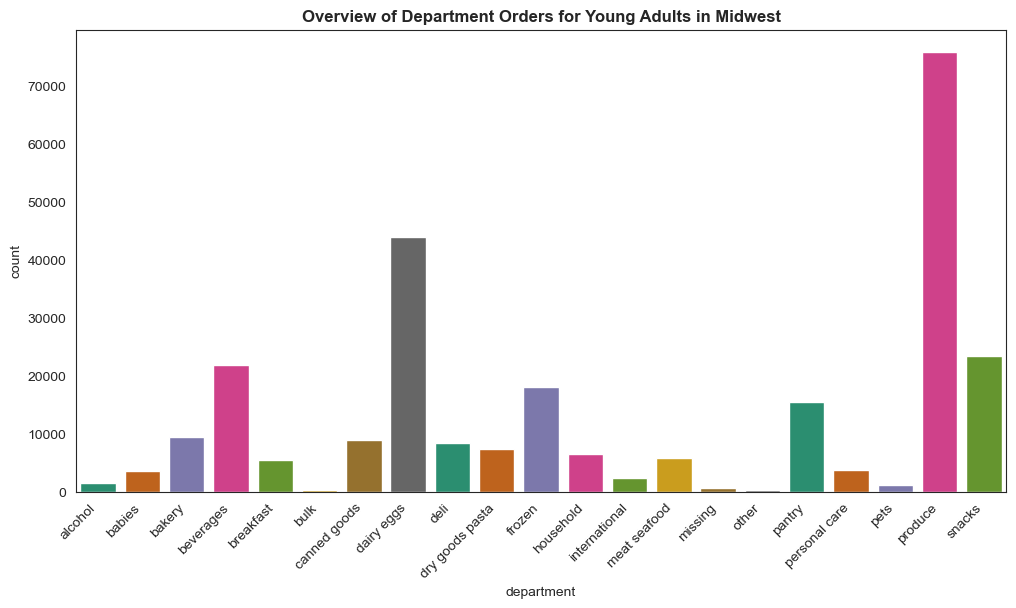

In [22]:
# what are the most popular types of orders from Young Adults in Midwest? 
plt.figure(figsize=(12, 6))
sns.set_style('white')
ya_midwest_dept = sns.countplot(data=df_ya_midwest, x='department', palette = 'Dark2')
ya_midwest_dept.set_xticklabels(ya_midwest_dept.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders for Young Adults in Midwest', fontweight = 'bold')
ya_midwest_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ya_midwest_dept.png'))

In [23]:
# top 4 departments are consistent with the general trend (produce, dairy eggs, snacks, beverages).
# in addition, pantry and frozen foods are also popular with young adults in Midwest.

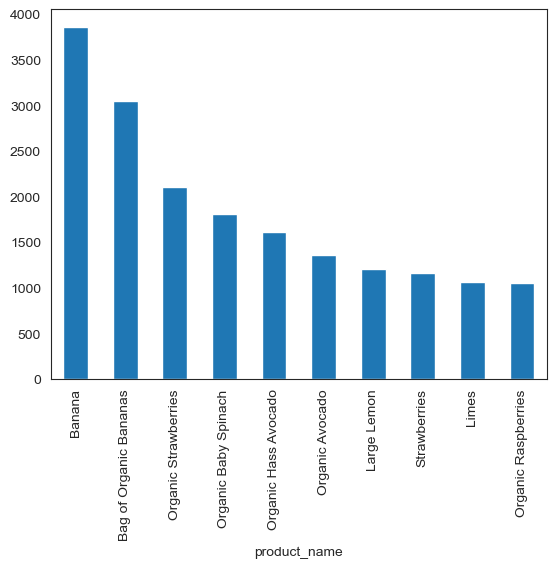

In [24]:
midwest = df_ya_midwest['product_name'].value_counts().head(10)
top_10_ya_midwest = midwest.plot.bar()
top_10_ya_midwest.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_ya_midwest.png'))

In [25]:
midwest

product_name
Banana                    3860
Bag of Organic Bananas    3047
Organic Strawberries      2104
Organic Baby Spinach      1803
Organic Hass Avocado      1604
Organic Avocado           1354
Large Lemon               1200
Strawberries              1164
Limes                     1058
Organic Raspberries       1045
Name: count, dtype: int64

#### The top items for young adults in midwest are concentrated in product and the focus is on organic. In particular, midwestern young adults have a preference for organic raspberries. 

###  Top Products from South 


#### Since South generates the most revenue and also has the highest number of orders for all categories, we look at the types of products preferred by Southern customers. The trend is consistent with the trend for the general population. 

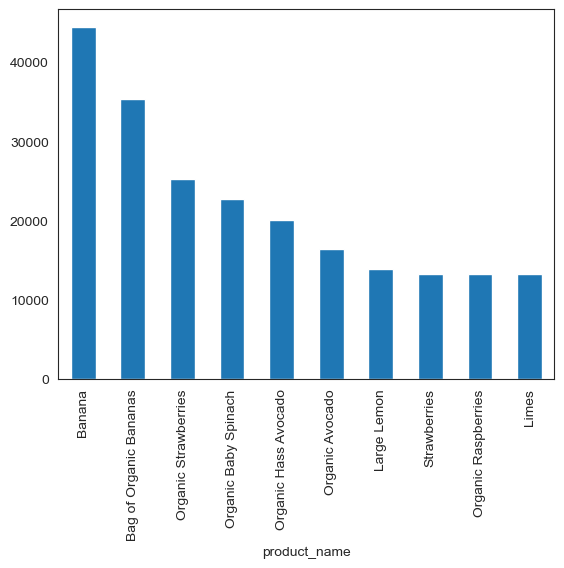

In [60]:
south= df[df['Region'] == 'South']
south_top_10 = south['product_name'].value_counts().head(10)
south_top_10_plot = south_top_10.plot.bar()
south_top_10_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','south_top_10.png'))

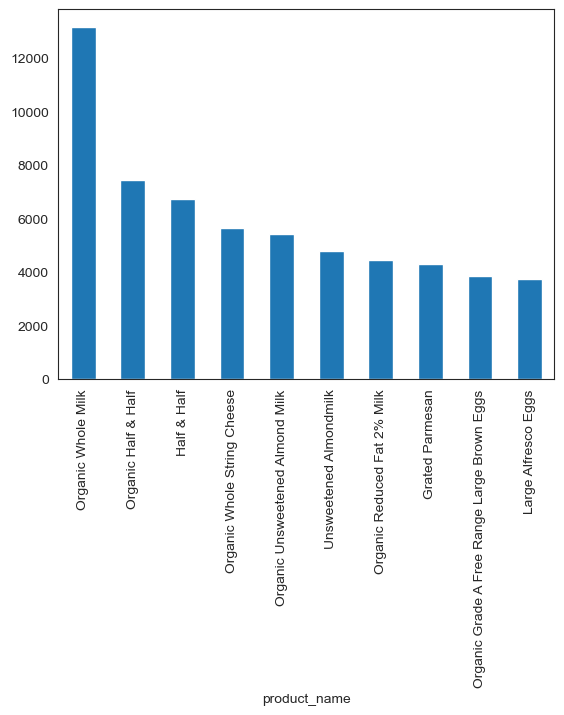

In [61]:
south_dairy= df[(df['Region'] == 'South') & (df['department'] == 'dairy eggs')]
top_10_south_dairy = south_dairy['product_name'].value_counts().head(10)
top_10_south_dairy_plot= top_10_south_dairy.plot.bar()
top_10_south_dairy_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_south_dairy.png'))

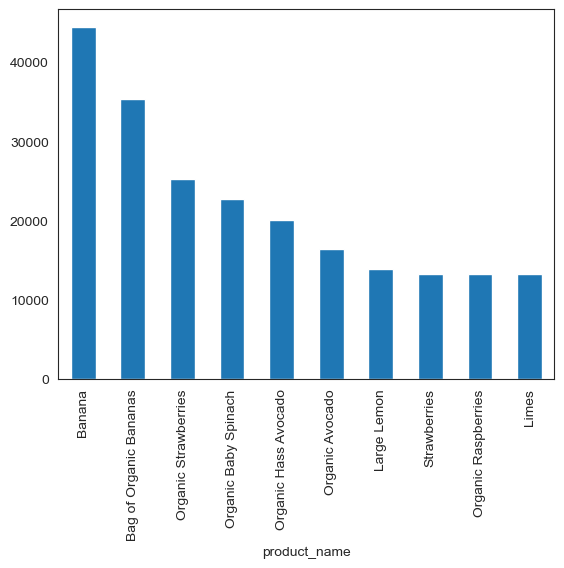

In [62]:
south_produce= df[(df['Region'] == 'South') & (df['department'] == 'produce')]
top_10_south_produce = south_produce['product_name'].value_counts().head(10)
top_10_south_produce_plot= top_10_south_produce.plot.bar()
top_10_south_produce_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_south_produce.png'))

#### Since dairy and produce are the most popular categories, we look at the types of items preferred Southern customers in these departments.  These trends track of those of the general population. Since the South is the highest performer, Instacart would do well to keep up their marketing of these products. 

## Data Insights for Pet Owners 

In [44]:
# Total spending by customers based on pet ownership 
df.groupby('pet_status')['prices'].sum().sort_values(ascending=False)

C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\1814219984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('pet_status')['prices'].sum().sort_values(ascending=False)


pet_status
Not a Pet Owner    106973850.6
Pet Owner             213290.3
Name: prices, dtype: float64

In [43]:
# majority of orders come from non-pet owners
df['pet_status'].value_counts(normalize=True)

pet_status
Not a Pet Owner    0.997014
Pet Owner          0.002986
Name: proportion, dtype: float64

#### Based on the data, pet owners constitute less than 0.3 % of the total customer base and the total amount of spending from pet owners is only a fraction of the spending by non-pet owners. Therefore, segmenting customers by pet ownership may not provide informative insights.

## Data Insights for the Northeast 
#### As we saw, Northeast generates the lowest count of orders. How do boost orders in Northeast? What are the sales trend in this region? What are the most popular departments? 

C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\2535642946.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  northeast_dept = sns.countplot(data=df_northeast, x='department', palette = 'Set2')
C:\Users\Windows\AppData\Local\Temp\ipykernel_7084\2535642946.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  northeast_dept.set_xticklabels(northeast_dept.get_xticklabels(), rotation=45, horizontalalignment='right')


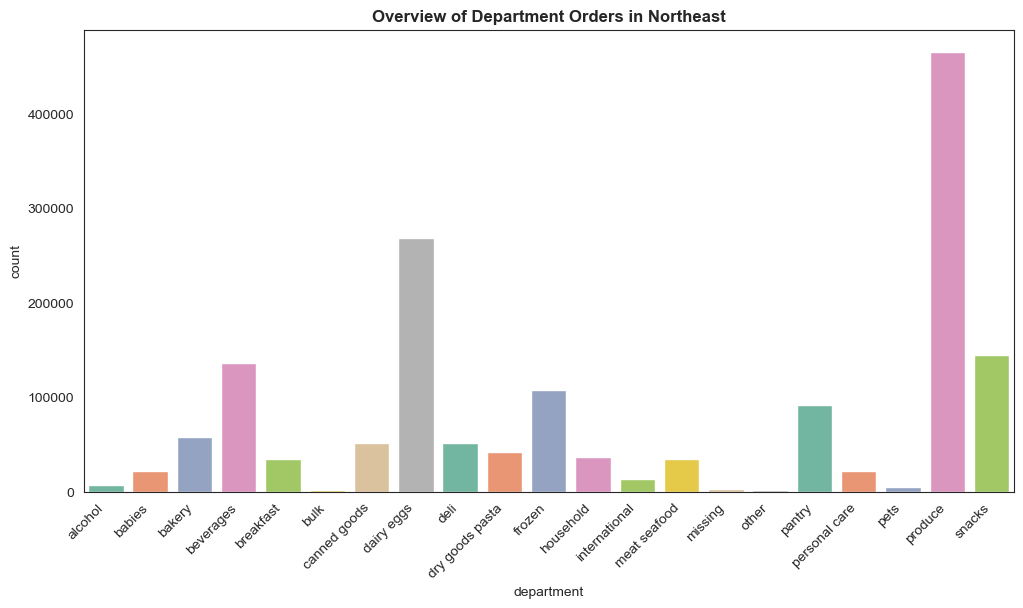

In [51]:
df_northeast = df[df['Region'] == 'Northeast']
plt.figure(figsize=(12, 6))
sns.set_style('white')
northeast_dept = sns.countplot(data=df_northeast, x='department', palette = 'Set2')
northeast_dept.set_xticklabels(northeast_dept.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Overview of Department Orders in Northeast', fontweight = 'bold')
northeast_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'northeast_dept.png'))

#### By department, it's same 5-department trend we have seen for various customer and regional profiles: produce, dairy, beverages, snacks, and pantry. 

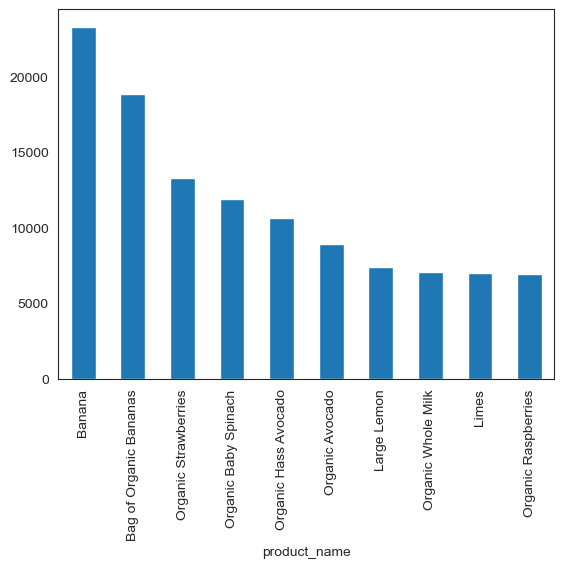

In [53]:
northeast = df_northeast['product_name'].value_counts().head(10)
top_10_northeast = northeast.plot.bar()
top_10_northeast.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_northeast.png'))

#### Based on the data, Northeast is a health conscious segment. Northeastern also prefers organic raspberries. 

In [87]:
northeast_food = df_northeast[df_northeast['department'] == 'bulk']

In [88]:
northeast_food

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,date_joined,n_dependants,fam_status,income,Region,age_group,income_group,department,dependant_group,pet_status
25875,5161,Dried Mango,10,10,6.1,3327295,50005,7,6,18,...,4/9/2019,3,married,115468,Northeast,Senior,high income,bulk,Yes,Not a Pet Owner
25877,5161,Dried Mango,10,10,6.1,237269,50005,9,6,17,...,4/9/2019,3,married,115468,Northeast,Senior,high income,bulk,Yes,Not a Pet Owner
25878,5161,Dried Mango,10,10,6.1,1770347,50005,10,6,17,...,4/9/2019,3,married,115468,Northeast,Senior,high income,bulk,Yes,Not a Pet Owner
42573,5161,Dried Mango,10,10,6.1,1968238,74194,11,5,9,...,3/7/2018,2,married,40751,Northeast,Adult,low income,bulk,Yes,Not a Pet Owner
42578,5161,Dried Mango,10,10,6.1,2841834,74194,32,1,11,...,3/7/2018,2,married,40751,Northeast,Adult,low income,bulk,Yes,Not a Pet Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32053142,30365,Vegetable Chips,10,10,7.2,892495,38121,5,1,12,...,8/4/2019,1,married,56387,Northeast,Adult,middle income,bulk,Yes,Not a Pet Owner
32157328,6455,Organic Magic Muesli,10,10,8.3,2485865,137229,7,0,18,...,5/23/2019,2,living with parents and siblings,56102,Northeast,Young Adult,middle income,bulk,Yes,Not a Pet Owner
32157340,14985,Organic Raspberry Muesli,10,10,12.5,2930258,137229,1,3,12,...,5/23/2019,2,living with parents and siblings,56102,Northeast,Young Adult,middle income,bulk,Yes,Not a Pet Owner
32364180,45682,Organic Turkish Apricots,10,10,5.4,1234656,89143,4,0,14,...,10/21/2019,2,married,164073,Northeast,Adult,high income,bulk,Yes,Not a Pet Owner


## Data Insights from the Top 5 departments (Dairy Eggs, Produce, Snacks, Beverages, Frozen)

### Top Products in Dairy Eggs

In [27]:
df_dairy = df[df['department'] == 'dairy eggs']

In [28]:
c = df_dairy['product_name'].value_counts().head(10)

In [29]:
c

product_name
Organic Whole Milk                             39105
Organic Half & Half                            21643
Half & Half                                    19727
Organic Whole String Cheese                    17332
Organic Unsweetened Almond Milk                16497
Unsweetened Almondmilk                         13883
Organic Reduced Fat 2% Milk                    13778
Grated Parmesan                                12833
Large Alfresco Eggs                            11602
Organic Grade A Free Range Large Brown Eggs    11254
Name: count, dtype: int64

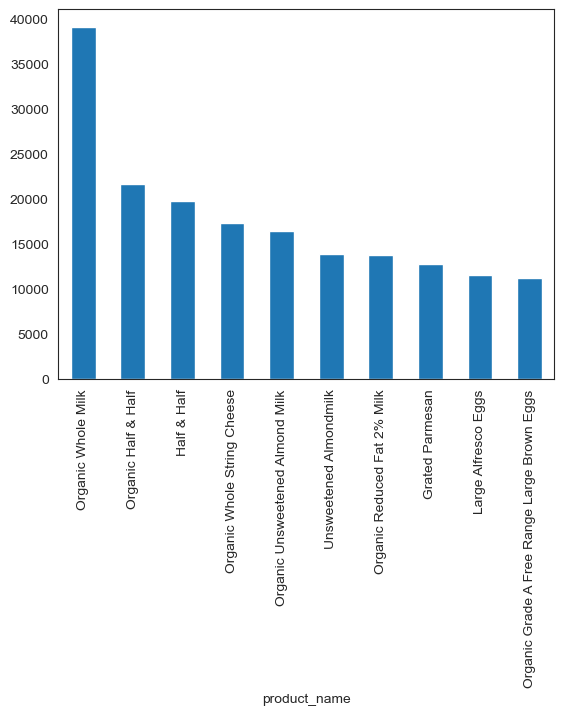

In [30]:
top_10_dairy = c.plot.bar()

In [31]:
top_10_dairy.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_dairy.png'))

### Top 10 in Beverages

In [32]:
df_bev = df[df['department'] == 'beverages']

In [33]:
d = df_bev['product_name'].value_counts().head(10)

In [34]:
d

product_name
Sparkling Water Grapefruit         21370
Spring Water                       15913
Lime Sparkling Water               13013
Sparkling Natural Mineral Water    12132
100% Raw Coconut Water             10900
Soda                               10109
Sparkling Lemon Water               9260
Italian Sparkling Mineral Water     8796
Pure Sparkling Water                7984
Original Orange Juice               6931
Name: count, dtype: int64

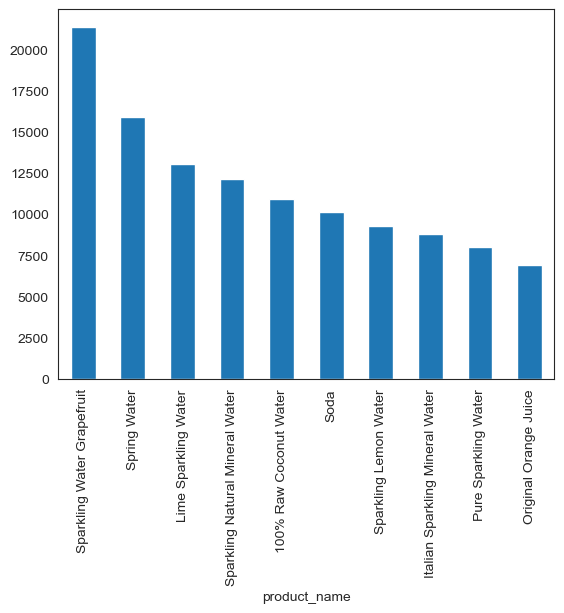

In [35]:
top_10_bev = d.plot.bar()
top_10_bev.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_bev.png'))

### Top 10 in Produce 

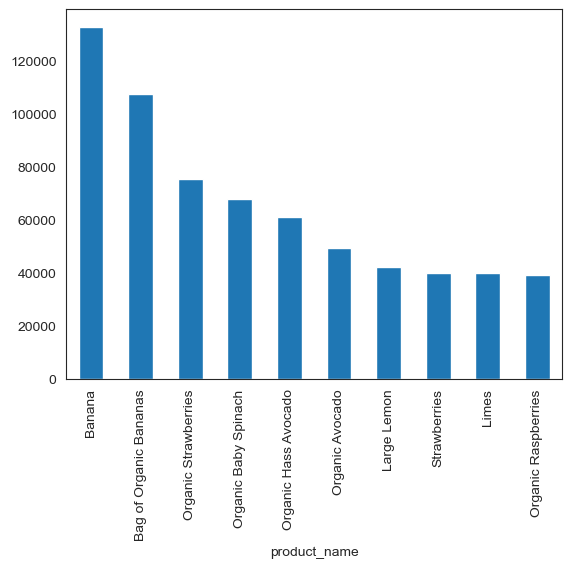

In [36]:
df_produce = df[df['department'] == 'produce']
e = df_produce['product_name'].value_counts().head(10)
top_10_produce = e.plot.bar()
top_10_produce.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_produce.png'))

In [37]:
e

product_name
Banana                    132613
Bag of Organic Bananas    107300
Organic Strawberries       75198
Organic Baby Spinach       67760
Organic Hass Avocado       60886
Organic Avocado            49337
Large Lemon                41985
Strawberries               39759
Limes                      39636
Organic Raspberries        38947
Name: count, dtype: int64

### Top 10 in Snacks

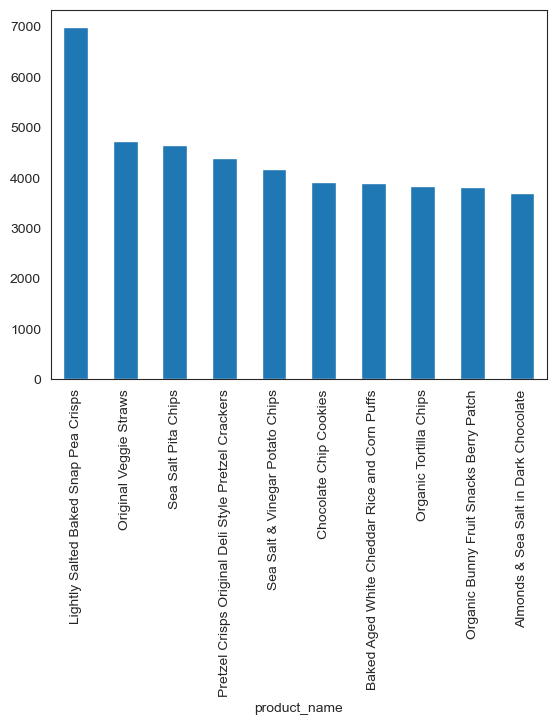

In [38]:
df_snacks = df[df['department'] == 'snacks']
f = df_snacks['product_name'].value_counts().head(10)
top_10_snacks = f.plot.bar()
top_10_snacks.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_snacks.png'))

In [39]:
f

product_name
Lightly Salted Baked Snap Pea Crisps                   6987
Original Veggie Straws                                 4742
Sea Salt Pita Chips                                    4654
Pretzel Crisps Original Deli Style Pretzel Crackers    4405
Sea Salt & Vinegar Potato Chips                        4172
Chocolate Chip Cookies                                 3910
Baked Aged White Cheddar Rice and Corn Puffs           3903
Organic Tortilla Chips                                 3849
Organic Bunny Fruit Snacks Berry Patch                 3827
Almonds & Sea Salt in Dark Chocolate                   3704
Name: count, dtype: int64

### Top 10 Frozen Food Items

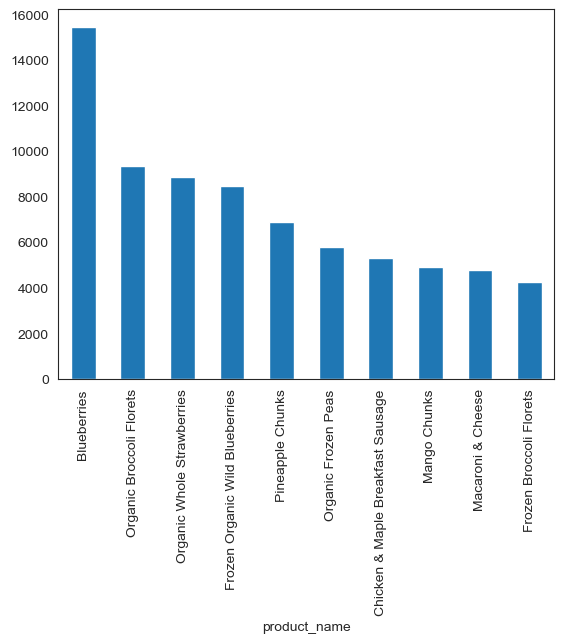

In [40]:
df_frozen = df[df['department'] == 'frozen']
g = df_frozen['product_name'].value_counts().head(10)
top_10_frozen = g.plot.bar()
top_10_frozen.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','top_10_frozen.png'))

In [41]:
g

product_name
Blueberries                          15459
Organic Broccoli Florets              9332
Organic Whole Strawberries            8851
Frozen Organic Wild Blueberries       8463
Pineapple Chunks                      6913
Organic Frozen Peas                   5778
Chicken & Maple Breakfast Sausage     5291
Mango Chunks                          4911
Macaroni & Cheese                     4772
Frozen Broccoli Florets               4255
Name: count, dtype: int64